In [3]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
%autoreload 2

In [5]:
%matplotlib inline

from pathlib import Path
import itertools

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from palmerpenguins import load_penguins

from matplottoy.data import iris
from matplottoy.encoders import color, position
from matplottoy.artists import point, bar, utils

spath = Path("../../../draft/figures/code/")

In [6]:
penguins = load_penguins()

In [7]:
penguins['species'].value_counts().reset_index()

,index,species
0,Adelie,152
1,Gentoo,124
2,Chinstrap,68


In [8]:
table = iris.DataFrame(penguins['species'].value_counts().reset_index())

In [9]:
fts = {'position':('index', position.Nominal({'Adelie': 0,  'Chinstrap': 1, 'Gentoo': 2})),  
        'length':('species', position.Identity()), 
        'facecolors': ('index', color.Categorical({'Adelie':'#FF8C00',
                                                'Gentoo':'#159090',
                                                'Chinstrap':'#A034F0'}))}

In [10]:
table.view()['index']

0       Adelie
1       Gentoo
2    Chinstrap
Name: index, dtype: object

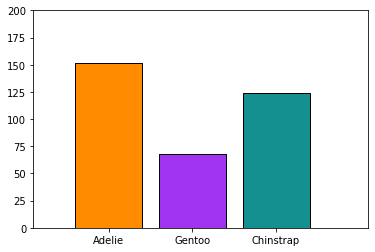

In [11]:
fig, ax = plt.subplots()

artist = bar.Bar(table, fts)
ax.add_artist(artist)
ax.set(xlim = (-0.5, 3.5), 
       ylim = (0,200),
       xticks = [.4, 1.4, 2.4],
       xticklabels = table.view()['index'])
fig.savefig(spath/"bar_v.png")

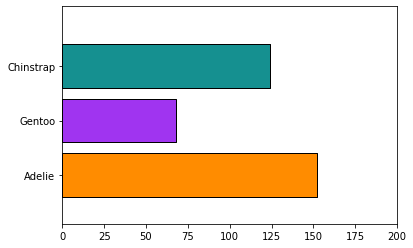

In [12]:
fig, ax = plt.subplots()

artist = bar.Bar(table, fts, orientation='horizontal')
ax.add_artist(artist)
ax.set(ylim = (-0.5, 3.5), 
       xlim = (0,200),
       yticks = [.4, 1.4, 2.4],
       yticklabels = table.view()['index'])
fig.savefig(spath/"bar_h.png")

# grouped bar

In [13]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [242]:
df = penguins.groupby(['island','species']).count()['sex'].reset_index()

In [244]:
tb = df.pivot(index=['island'], columns=['species'], values = 'sex').reset_index().fillna(0)

In [245]:
tb['Adelie_s'] = 'Adelie'
tb['Chinstrap_s'] = 'Chinstrap'
tb['Gentoo_s'] = 'Gentoo'

<AxesSubplot:>

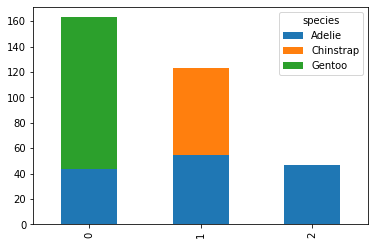

In [246]:
 df.pivot(index=['island'], columns=['species'], values = 'sex').reset_index().plot.bar(stacked=True)

In [247]:
bt = iris.DataFrame(tb)

In [248]:
bt.view()

species,island,Adelie,Chinstrap,Gentoo,Adelie_s,Chinstrap_s,Gentoo_s
0,Biscoe,44.0,0.0,119.0,Adelie,Chinstrap,Gentoo
1,Dream,55.0,68.0,0.0,Adelie,Chinstrap,Gentoo
2,Torgersen,47.0,0.0,0.0,Adelie,Chinstrap,Gentoo


In [249]:
# {channel: column, transformer: {name, multivariate}}
gts = {'position': ('island', position.Nominal({'Biscoe':0, 'Dream':1, 'Torgersen':2})),
        'length':(['Adelie', 'Chinstrap', 'Gentoo'], position.Identity()),
        'facecolors': (['Adelie_s', 'Chinstrap_s', 'Gentoo_s'], 
                        color.Categorical({'Adelie':'#FF8C00',
                                                'Gentoo':'#159090',
                                                'Chinstrap':'#A034F0'}))}
        

In [250]:
gts.items()

dict_items([('position', ('island', <matplottoy.encoders.position.Nominal object at 0x0000017CDD167D60>)), ('length', (['Adelie', 'Chinstrap', 'Gentoo'], <matplottoy.encoders.position.Identity object at 0x0000017CDD167580>)), ('facecolors', (['Adelie_s', 'Chinstrap_s', 'Gentoo_s'], <matplottoy.encoders.color.Categorical object at 0x0000017CDD1AAA30>))])

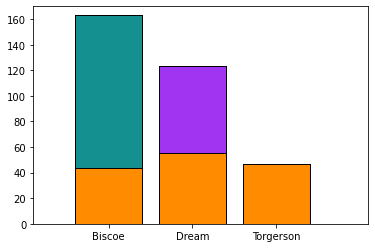

In [277]:
fig, ax = plt.subplots()
artist = bar.MultiBar(bt, gts, orientation='v', stacked=True)
ax.add_artist(artist)
_ = ax.set(ylim = (0, 170), 
       xlim = (-.5, 3.5),   
             xticks = [.4, 1.4, 2.4],
       xticklabels = ['Biscoe', 'Dream', 'Torgerson'],)
fig.savefig(spath/"bar_stacked.png")

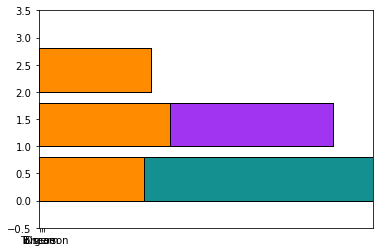

In [281]:
fig, ax = plt.subplots()
artist = bar.MultiBar(bt, gts, orientation='h', stacked=True)
ax.add_artist(artist)
_ = ax.set(xlim = (0, 140), 
       ylim = (-.5, 3.5),   
          xticks = [.4, 1.4, 2.4],
       xticklabels = ['Biscoe', 'Dream', 'Torgerson'])

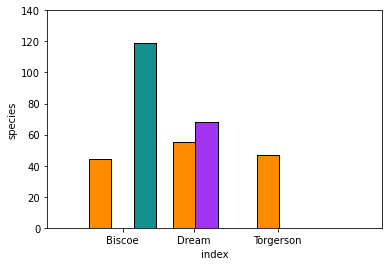

In [275]:
fig, ax = plt.subplots()
artist = bar.MultiBar(bt, gts, orientation='v', stacked=False)
ax.add_artist(artist)
_ = ax.set(ylim = (0, 140), 
       xlim = (-.5, 3.5),   
       xlabel = fts['position'][0], 
       ylabel = fts['length'][0],
       xticks = [.4, 1.25, 2.25],
       xticklabels = ['Biscoe', 'Dream', 'Torgerson'])
fig.savefig(spath/"bar_grouped.png")

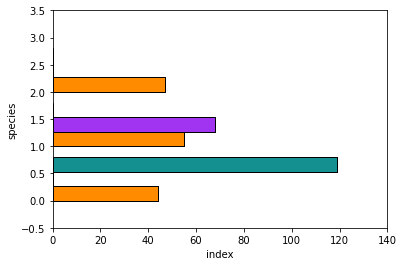

In [269]:
fig, ax = plt.subplots()
artist = bar.MultiBar(bt, gts, orientation='h', stacked=False)
ax.add_artist(artist)
_ = ax.set(xlim = (0, 140), 
       ylim = (-.5, 3.5),   
       xlabel = fts['position'][0], 
       ylabel = fts['length'][0], )